<a id=top-page></a>
# `pykitPIV` demo: Postprocess images

In this Jupyter notebook, we show how functionalities from the ``Postprocess`` class can be used to postprocess PIV images.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#postprocess-saved">Post-process saved dataset</a></li>
        <ul>
        <li><a href="#N-2-H-W">Pass an image tensor of size $(N, 2, H, W)$</a></li>
        <li><a href="#N-H-W">Pass an image tensor of size $(N, H, W)$</a></li>
        </ul>
    <li><a href="#postprocess-on-the-fly">Post-process on-the-fly user-created dataset</a></li>
        <ul>
        <li><a href="#shot-noise">Add shot noise to images</a></li>
        <li><a href="#gaussian-noise">Add Gaussian noise to images</a></li>
        </ul>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
import cmcrameri.cm as cmc
from pykitPIV import Image, Postprocess, Particle, FlowField

2025-05-23 14:23:03.621363: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
filename = None

In [3]:
figsize = (8,6)

<a id=postprocess-saved></a>
***

## Post-process saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [4]:
image = Image()

In [5]:
images_tensor_dic = image.upload_from_h5(filename='../docs/data/pykitPIV-dataset-10-PIV-pairs-256-by-256.h5')
images_tensor = images_tensor_dic['I']
images_tensor.shape

(10, 2, 256, 256)

<a id=N-2-H-W></a>

### Pass an image tensor of size $(N, 2, H, W)$

[Go to the top](#top-page)

In [6]:
postprocess = Postprocess(images_tensor)

Check that the image pair has been passed and not just one image:

In [7]:
postprocess.image_pair

True

First, we add Gaussian noise to the images:

In [8]:
postprocess.add_gaussian_noise(loc=0.0, 
                               scale=(100,200))

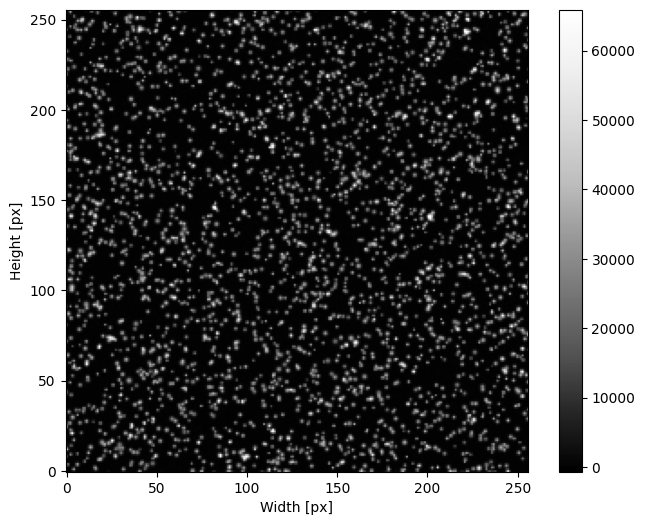

In [9]:
postprocess.plot(original=False,
                 idx=2,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 figsize=figsize);

In [10]:
np.min(postprocess.processed_image_tensor)

-863.6575232961519

Second, we perform a log-transformation of the images with the noise added:

In [11]:
postprocess.log_transform_images(addition=1000)

In [12]:
postprocess.processed_image_tensor.shape

(10, 2, 256, 256)

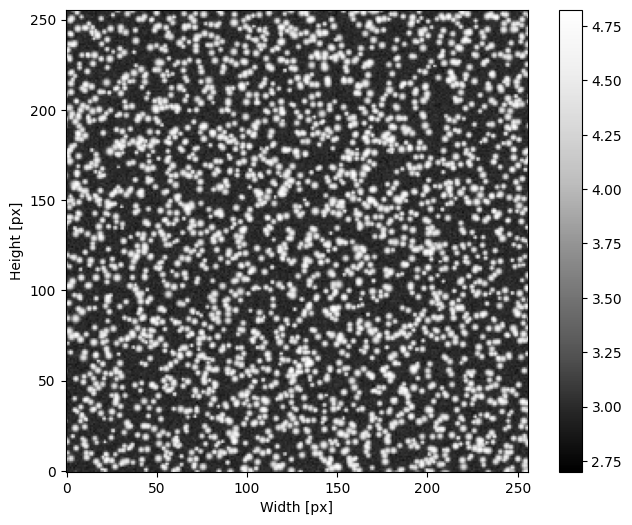

In [13]:
postprocess.plot(original=False,
                 idx=0,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 figsize=figsize);

<a id=N-H-W></a>

### Pass an image tensor of size $(N, H, W)$

[Go to the top](#top-page)

In [14]:
postprocess = Postprocess(images_tensor[:,0,:,:])

Check that single image instances, $I_1$, have been passed:

In [15]:
postprocess.image_pair

False

Perform a log-transformation of the images:

In [16]:
postprocess.log_transform_images(addition=1000)

In [17]:
postprocess.processed_image_tensor.shape

(10, 256, 256)

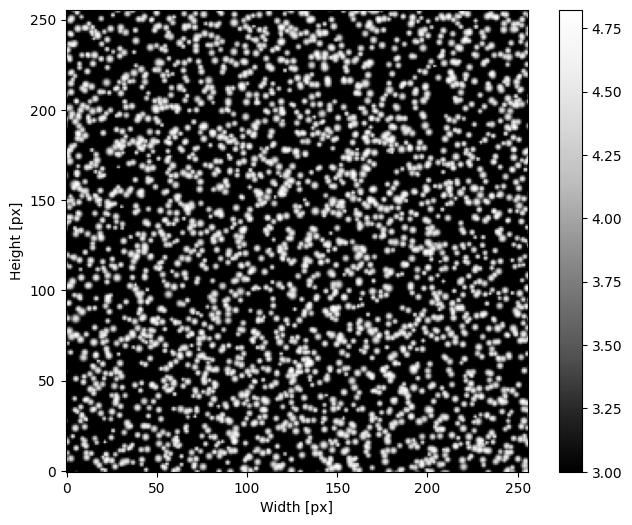

In [18]:
postprocess.plot(original=False,
                 idx=0,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 figsize=figsize);

Add Gaussian noise to the log-transformed images:

In [19]:
postprocess.add_gaussian_noise(loc=0.0, 
                               scale=(0.1,0.2))

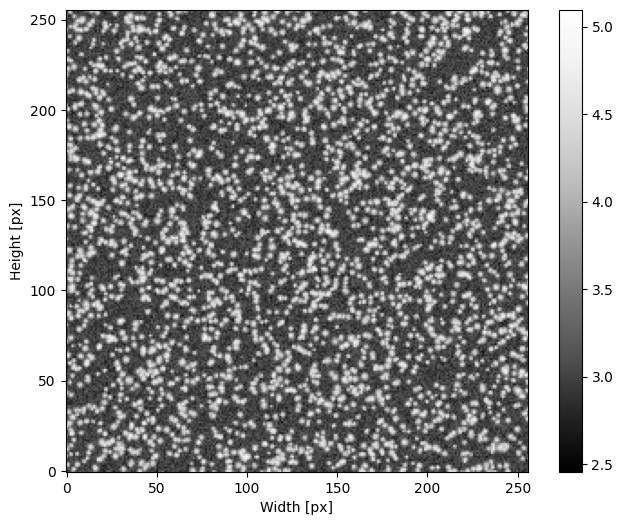

In [20]:
postprocess.plot(original=False,
                 idx=2,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 figsize=figsize);

<a id=postprocess-on-the-fly></a>

***

## Post-process on-the-fly user-created dataset

[Go to the top](#top-page)

In [21]:
n_images = 1
image_size = (50, 50)
size_buffer = 0
figsize=(6,4)

In [22]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=4,
                     densities=0.05,
                     diameter_std=0,
                     seeding_mode='random', 
                     random_seed=100)

In [23]:
image = Image(random_seed=100)

In [24]:
image.add_particles(particles)

In [25]:
image.add_reflected_light(exposures=(0.99,0.99),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/8)

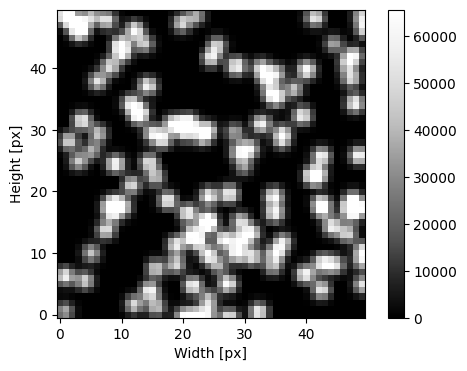

In [26]:
plt = image.plot(0, 
                 with_buffer=True,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 origin='lower',
                 figsize=figsize);

In [27]:
images_tensor = image.images_I1[:,0,:,:]

In [28]:
images_tensor.shape

(1, 50, 50)

<a id=shot-noise></a>

### Add shot noise to images

[Go to the top](#top-page)

In [29]:
postprocess = Postprocess(images_tensor, 
                          random_seed=100)

First, we add shot noise to the images:

In [30]:
postprocess.add_shot_noise(strength=1,
                           clip=2**16-1)

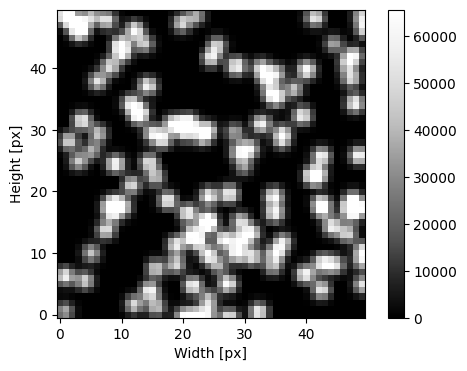

In [31]:
postprocess.plot(original=True,
                 idx=0,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cbar=True,
                 cmap='Greys_r',
                 figsize=figsize);

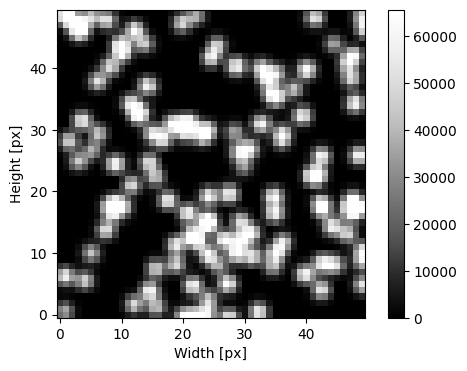

In [32]:
postprocess.plot(original=False,
               idx=0,
               instance=1,
               xlabel='Width [px]',
               ylabel='Height [px]',
               cbar=True,
               cmap='Greys_r',
               vmin=0,
               vmax=2**16-1,
               figsize=figsize);

In [33]:
np.min(postprocess.processed_image_tensor)

0.0

In [34]:
np.max(postprocess.processed_image_tensor)

65535.0

<a id=gaussian-noise></a>

### Add Gaussian noise to images

[Go to the top](#top-page)

Add Gaussian noise atop the shot noise:

In [35]:
postprocess.add_gaussian_noise(loc=0.0,
                               scale=10000,
                               clip=2**16-1)

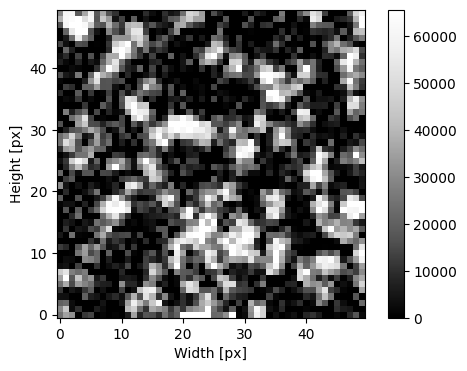

In [36]:
postprocess.plot(original=False,
                   idx=0,
                   instance=1,
                   xlabel='Width [px]',
                   ylabel='Height [px]',
                   cbar=True,
                   cmap='Greys_r',
                   figsize=figsize);

In [37]:
np.min(postprocess.processed_image_tensor)

0.0

In [38]:
np.max(postprocess.processed_image_tensor)

65535.0

***

© K. Zdybał, C. Mucignat, S. Kunz, I. Lunati (2025)